In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
import numpy as np
import pickle
from scipy.misc import imread

from helpers import show_images, save_image, scale_abs
from birdseye import BirdsEye

In [2]:
calibration_data = pickle.load(open("calibration_data.p", "rb" ))

matrix = calibration_data['camera_matrix']
dist_coef = calibration_data['distortion_coefficient']

source_points = [(580, 460), (205, 720), (1110, 720), (703, 460)]
dest_points = [(320, 0), (320, 720), (960, 720), (960, 0)]

birdsEye = BirdsEye(source_points, dest_points, matrix, dist_coef)

In [3]:
raw1= imread("test_images/straight_lines1.jpg")
raw2 = imread("test_images/straight_lines2.jpg")

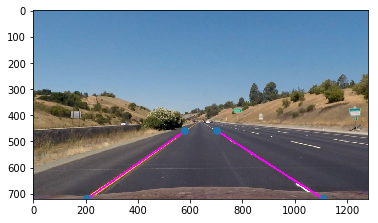

In [4]:
temp = birdsEye.undistort(raw1, show_dotted = True)

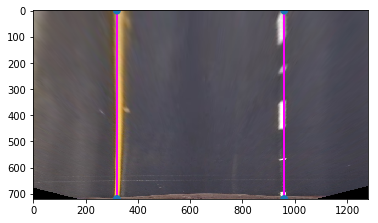

In [5]:
temp = birdsEye.sky_view(raw1, show_dotted = True)

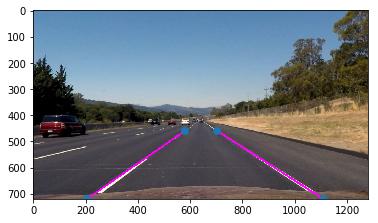

In [6]:
temp = birdsEye.undistort(raw2, show_dotted = True)

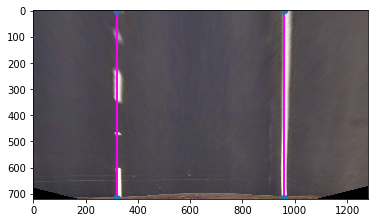

In [7]:
temp = birdsEye.sky_view(raw2, show_dotted = True)

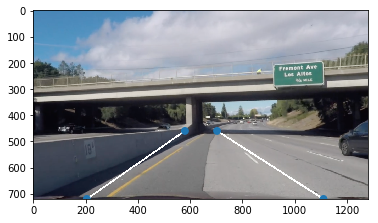

In [8]:
raw = imread("test_images/special_test1.jpg")
temp = birdsEye.undistort(raw, show_dotted = True)

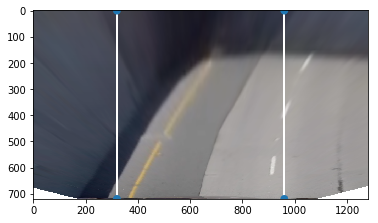

In [9]:
temp = birdsEye.sky_view(raw, show_dotted = True)

In [10]:
save_image(birdsEye.sky_view(raw1), "birdseye-straight", 1)
save_image(birdsEye.sky_view(raw2), "birdseye-straight", 2)
save_image(birdsEye.sky_view(raw), "birdseye-special-test", 1)

for i in range(1, 7):
  temp = imread("test_images/test" + str(i) + ".jpg")
  save_image(birdsEye.sky_view(temp), "birdseye-test", i)
  save_image(birdsEye.undistort(temp), "undistort-test", i)